<a href="https://colab.research.google.com/github/AchinthaThennakoon/deep-learning-tutorial/blob/main/CNN_img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

Import datset

In [11]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [12]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

we get a 2d array, we need to reshape it

In [14]:
y_train =  y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [16]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

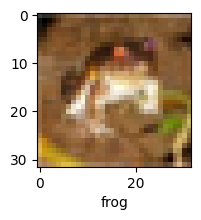

In [17]:
plot_sample(X_train,y_train,0)

# Normalize data

In [18]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [19]:
X_train = X_train/255
X_test = X_test/255


In [20]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## ANN model

In [21]:
model =  keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),  #falt array to 1D (32*32*3)
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')  #output laye
])

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy', # when you have one hot encoding for y use this
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.8134 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.6225 - accuracy: 0.4289
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5411 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4819 - accuracy: 0.4793
Epoch 5/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4324 - accuracy: 0.4967


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.38      0.49      1000
           1       0.73      0.41      0.53      1000
           2       0.51      0.11      0.18      1000
           3       0.27      0.38      0.32      1000
           4       0.49      0.30      0.37      1000
           5       0.29      0.56      0.38      1000
           6       0.42      0.68      0.52      1000
           7       0.53      0.53      0.53      1000
           8       0.47      0.75      0.58      1000
           9       0.69      0.34      0.45      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



# CNN model

In [23]:
cnn = keras.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [24]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.5502 - accuracy: 0.4392
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2404 - accuracy: 0.5610
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1115 - accuracy: 0.6068
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0326 - accuracy: 0.6385
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9850 - accuracy: 0.6561
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9376 - accuracy: 0.6726
Epoch 7/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9079 - accuracy: 0.6821
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8826 - accuracy: 0.6926
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8557 - accuracy: 0.7035
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9274 - accuracy: 0.6792


[0.927388072013855, 0.6791999936103821]

In [27]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(y_pred_classes[0])

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.80      0.79      0.80      1000
           2       0.67      0.47      0.55      1000
           3       0.46      0.58      0.51      1000
           4       0.59      0.66      0.62      1000
           5       0.63      0.53      0.58      1000
           6       0.73      0.79      0.76      1000
           7       0.70      0.77      0.73      1000
           8       0.77      0.77      0.77      1000
           9       0.77      0.73      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



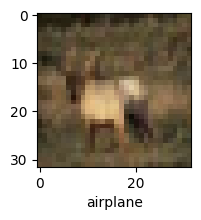

In [28]:
y_test = y_test.reshape(-1,)
plot_sample(X_test,y_test,3)